In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage.filters import gaussian_filter1d as gfilt
%matplotlib inline

### First - Read the data from the LabView text files
In this example we'll define a function using`pandas`

In [2]:
def read_data(filename):
    """This function reads a text file from the Langmuir Trough lab view program and returns  
    suface pressure vs. area per molecule as a pandas datafram
    """
    #read all data into a dataframe
    data = pd.read_csv(filename, skiprows=23, delimiter='\t',
                names=['time', 'balance', 'barrier', 'area', 'surf_p','comment'])
                       
    return data

In [3]:
data = read_data('example_data.txt')

In [4]:
data.head()

,time,balance,barrier,area,surf_p,comment
0,0.000000,1.860023,0.199398,59.610250,-0.490364,0
1,0.562500,1.844341,0.198635,59.632788,-0.107248,0
2,1.031250,1.819516,0.199017,59.621519,0.499223,0
3,1.515625,1.836595,0.198890,59.625276,0.081983,0
4,2.000000,1.854372,0.198890,59.625276,-0.352319,0


In [5]:
# For comparision here is literature data taken from the plot in the lab handout (22.3C)
lit = pd.read_excel('lit_data_22C.xlsx')

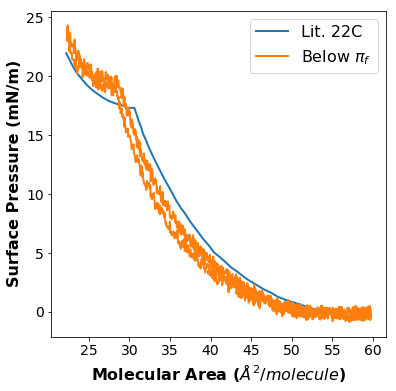

In [6]:
#create a figure
fig = plt.figure(figsize = (6,6))

# add content to the figure

plt.plot(lit['mol_area'], lit['surf_p'], label='Lit. 22C', linewidth=2)

# note: in the label "$" is used to start and end text rendered like LaTex
plt.plot(data['area'], data['surf_p'], label='Below $\pi_f$', linewidth=2)

# label the figure
# note: used unicode u00c5 to get angstrom symbol
plt.xlabel('Molecular Area ($\u00c5^2/molecule$)', fontsize=16, weight='bold')
plt.ylabel('Surface Pressure (mN/m)', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)


### The data is noisy.  Her are some examples of how filtering can be applied

Import a filtering function, then apply to the surface pressure data when plotting

In [7]:
from scipy.ndimage.filters import gaussian_filter1d as gfilt
from scipy.signal import medfilt

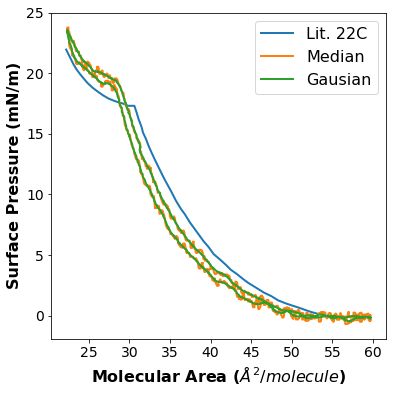

In [8]:
#create a figure
fig = plt.figure(figsize = (6,6))

# add content to the figure

plt.plot(lit['mol_area'], lit['surf_p'], label='Lit. 22C', linewidth=2)

# try two differnt types of filters for comparison
plt.plot(data['area'], medfilt(data['surf_p'], kernel_size=7), label='Median', linewidth=2)
plt.plot(data['area'], gfilt(data['surf_p'], sigma=7), label='Gausian', linewidth=2)
# label the figure
# note: used unicode u00c5 to get angstrom symbol
plt.xlabel('Molecular Area ($\u00c5^2/molecule$)', fontsize=16, weight='bold')
plt.ylabel('Surface Pressure (mN/m)', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)